In [1]:
# name: Goh Jun Huang
# student id: 220399308
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2, gamma, norm, binom

# Question 1

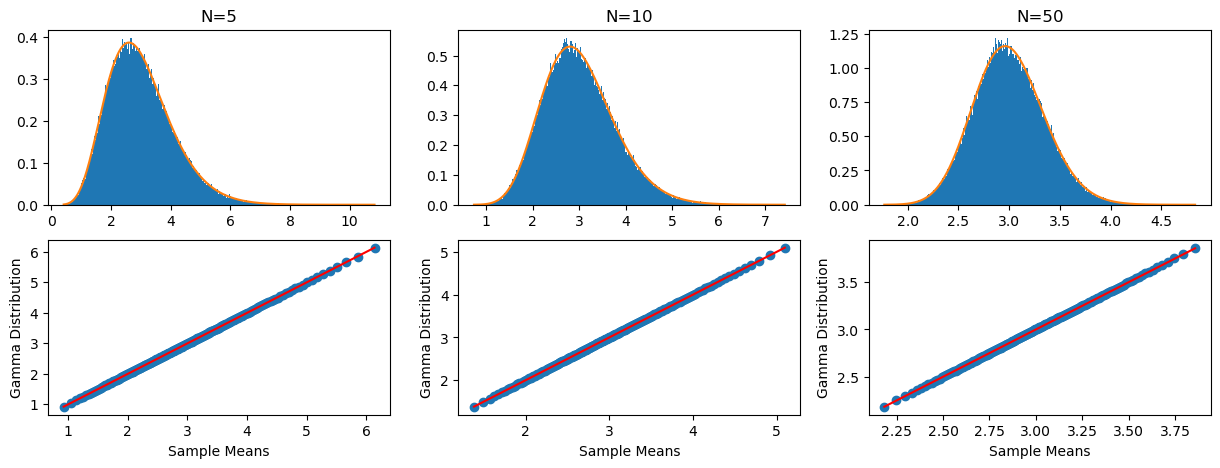

In [2]:
fig, axs = plt.subplots(2, 3, figsize=(15, 5))
k = 3
N = [5, 10, 50]
size = 100000

X = [[chi2.rvs(k, size=n) for i in range(size)] for n in N]
for i in range(len(N)):
    # histogram from chi2
    x = [sum(j) / len(j) for j in X[i]]
    axs[0][i].hist(x, int(np.sqrt(size)), density=True)
    axs[0][i].set_title('N={}'.format(N[i]))
    
    # gamma pdf
    x_gamma = np.linspace(min(x), max(x), size)
    a = N[i] * k / 2
    b = 2 / N[i]
    y = gamma.pdf(x_gamma, a, scale=b)
    axs[0][i].plot(x_gamma, y)
    
    # QQ plot
    percent = np.arange(0.5, 99.5, 0.5)
    percentile1 = np.percentile(x, percent)
    percentile2 = gamma.ppf(percent / 100, a, scale=b)
    axs[1][i].plot(percentile1, percentile2, 'o')
    axs[1][i].plot(percentile1, percentile1, color='red')
    axs[1][i].set_xlabel('Sample Means')
    axs[1][i].set_ylabel('Gamma Distribution')
plt.show()

# Question 2

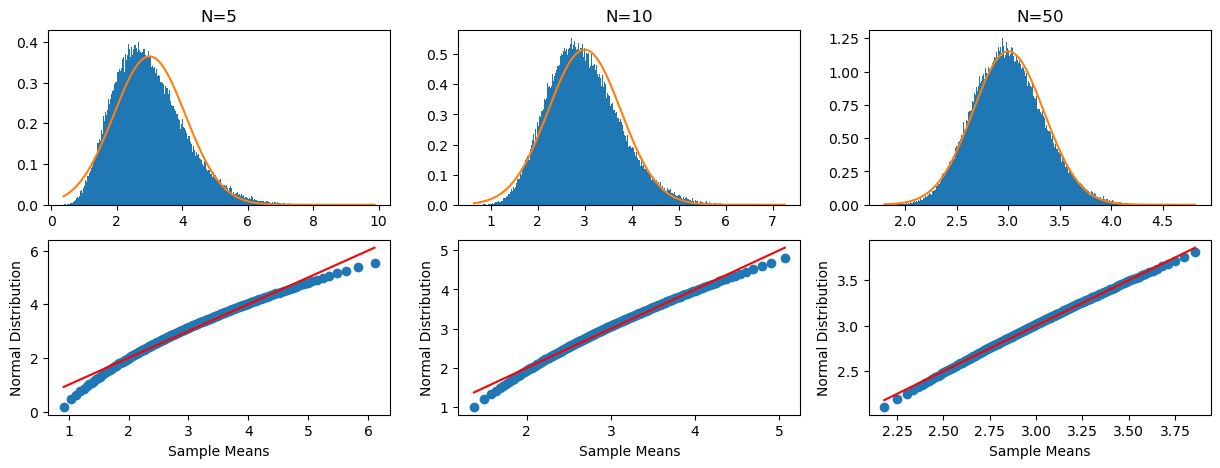

In [3]:
fig, axs = plt.subplots(2, 3, figsize=(15, 5))
k = 3
N = [5, 10, 50]
size = 100000

X = [[chi2.rvs(k, size=n) for i in range(size)] for n in N]
for i in range(len(N)):
    # histogram from chi2
    x = [sum(j) / len(j) for j in X[i]]
    axs[0][i].hist(x, int(np.sqrt(size)), density=True)
    axs[0][i].set_title('N={}'.format(N[i]))
    
    # normal pdf
    x_norm = np.linspace(min(x), max(x), size)
    mean = k
    std = np.sqrt(2 * k / N[i])
    y = norm.pdf(x_norm, loc=mean, scale=std)
    axs[0][i].plot(x_norm, y)
    
    # QQ plot
    percent = np.arange(0.5, 99.5, 0.5)
    percentile1 = np.percentile(x, percent)
    percentile2 = norm.ppf(percent / 100, loc=mean, scale=std)
    axs[1][i].plot(percentile1, percentile2, 'o')
    axs[1][i].plot(percentile1, percentile1, color='red')
    axs[1][i].set_xlabel('Sample Means')
    axs[1][i].set_ylabel('Normal Distribution')
plt.show()

The approximate density of sample means given by the CLT is indistinguishable from the actual density when N=50.

# Question 3

$H_{0}$: There is significant changed in the probability of the number of COVID-positive children in a class.

In [4]:
N = 120
p = 0.1
a = 0.95
sl = (1 - a) / 2

In [5]:
pval = binom.pmf(20, N, p)
print('The probability under H0 of having observed 20 cases is ', pval)

The probability under H0 of having observed 20 cases is  0.007825579711977095


In [6]:
pval = binom.sf(20, N, p)
print('The probability under H0 of having observed an outcome at least as extreme as 20 cases is ', pval)

The probability under H0 of having observed an outcome at least as extreme as 20 cases is  0.007941192248396997


In [7]:
pval < sl

True

$H_{0}$ is rejected as p < 1 - $\alpha$. This means there is no significant changed in the probability of the number of COVID-positive children in a class.

It is no longer practical to use an exact test with a Binomial distribution because it is difficult to compute large factorial.

In [8]:
N = 300
var = binom.var(30, p)
std = np.sqrt(var)
mean = binom.mean(30, p)
smean = 945 / N
z = (np.sqrt(N) * (smean - mean)) / std
pval = norm.sf(z, loc=mean, scale=std)
print('The p-value is ', pval)

The p-value is  0.8060663297630877


In [9]:
abs(pval) > sl

True

$H_{0}$ is not rejected as p > 1 - $\alpha$. It says that there is significant changes regarding the epidemic which contradict with the result of previous small-scale trial.